# Serial Models in Data Science - Assignment 1

### Part I - Bayesian Inference

<B>Students:<br/>Guy Shafir - 315941799 <br/>Tamar Entin - 210014411</B>

### Table of Contents:

<a id="home"></a>


| Section| Topic |
| :- | :- |
| 1 |  [POISSON DISTRIBUTION](#POISSON_DISTRIBUTION) | 
| 2 |  [CONJUGATE PRIOR](#CONJUGATE_PRIOR) | 
| 3 |  [MARGINALIZING THE HYPER PARAMETERS](#MARGINALIZING) | 
| 4 |  [MAXIMUM LIKELIHOOD TYPE II](#MAXIMUM_LIKELIHOOD) | 
| 5 |  [PREDICTIVE POSTERIOR DISTRIBUTION](#POSTERIOR) | 
| 6 |  [MONTE-CARLO COMPUTATIONS](#MONTE_CARLO) | 


[Go to the beginning of the assignment](#home)
<a id="POISSON_DISTRIBUTION"></a><br/><br/>
<u>POISSON DISTRIBUTION</u>

The Poisson distribution is defined by the following expression for $X \sim P(\lambda)$:
$$ P(X = k) = \frac{e^{-\lambda}\lambda^k}{k!} $$

#### 1. Draw n = 100 samples from a Poisson distribution, using numpy.random.poisson(lam=5,size=100)

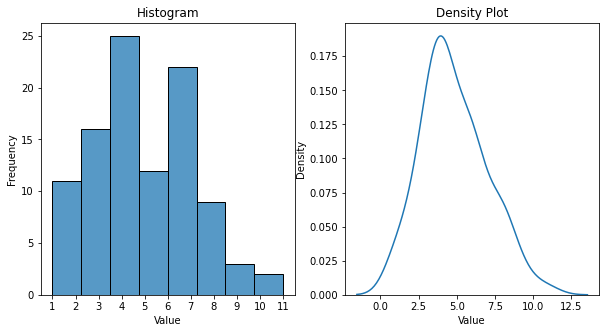

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Generate samples from Poisson distribution
samples = np.random.poisson(lam=5, size=100)

# Create histogram and density plot using seaborn
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=samples, ax=ax[0])
sns.kdeplot(samples, ax=ax[1])


# Set x-ticks
x_ticks = np.arange(samples.min(), samples.max() + 1)
ax[0].set_xticks(x_ticks)

# Set titles and labels
ax[0].set_title(f'Histogram')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')

ax[1].set_title(f'Density Plot')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Density')


plt.show()

[Go to the beginning of the assignment](#home)
<a id="CONJUGATE_PRIOR"></a><br/><br/>
<u>CONJUGATE PRIOR</u>

Given $X_1,\ldots,X_n \overset{i.i.d.}{\sim} \text{Poisson}(\lambda)$, one wants to define a conjugate prior for $\lambda$.

#### 1. Write the Poisson distribution as an exponential family.

Given that we have $X_1, \ldots, X_n \overset{i.i.d.}{\sim} \text{Poisson}(\lambda)$, we want to define a conjugate prior for $\lambda$. 

To do this, we first write the Poisson distribution as an exponential family.

The Poisson distribution can be written in the form of an exponential family as follows:

$$
f(x | \lambda) = h(x) \exp(\eta(\lambda) T(x) - A(\lambda))
$$

For the Poisson distribution, we define the following parameters:

- $h(x) = \frac{1}{x!}$
- $T(x) = x$
- $\eta(\lambda) = \ln(\lambda)$
- $A(\lambda) = \lambda$

Now we can write the Poisson distribution as an exponential family:

$$
f(x|\lambda) = h(x) \exp(\eta(\lambda) T(x) - A(\lambda)) = \frac{1}{x!} \exp(x \ln(\lambda) - \lambda)
$$


#### 2. Find the conjugate prior relying on the presentation as an exponential family.

Given $X_1,\ldots,X_n \overset{i.i.d.}{\sim} \text{Poisson}(\lambda)$, we want to find the conjugate prior for $\lambda$ by relying on its presentation as an exponential family.

The Poisson distribution can be written as an exponential family as follows:

$$
f(x|\lambda) = \frac{1}{x!} \exp(x \ln(\lambda) - \lambda)
$$

Here, we let $\delta = \ln(\lambda)$ be the natural parameter. Now, let's find the conjugate prior based on the information from the presentation above. For simplicity and to ease the calculations in the next steps, we can use $\alpha - 1$ instead of $\alpha$.

$$
\pi(\delta|\alpha,\beta) \propto \exp((\alpha-1)\delta - \beta e^{\delta})
$$

Or, in terms of $\lambda$:

$$
\pi(\lambda|\alpha,\beta) \propto \exp((\alpha-1) \ln(\lambda) - \beta \lambda)
$$



#### 3.Check that the prior you found is a Gamma distribution $\Gamma(\alpha, \beta)$, defined by the following density function: $$\pi(\lambda|\alpha,\beta)=\frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1}e^{-\beta\lambda}$$ with $\alpha, \beta > 0$. The Gamma function is defined by $$\Gamma(z)=\int_0^\infty t^{z-1} e^{-t} dt$$ for any complex number $z$ with $\Re(z) > 0$.


To check that the given prior is a Gamma distribution, we need to compare it with the density function of the Gamma distribution, which is given by:

$$
\pi(\lambda|\alpha,\beta)=\frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1}e^{-\beta\lambda}
$$

where $\alpha, \beta > 0$.

We can see that the prior distribution found in answer 2, which is:

$$
\pi(\lambda|\alpha,\beta) \propto \lambda^{\alpha-1} e^{-\beta\lambda}
$$

has the same form as the density function of the Gamma distribution, except for the normalization constant. To show that the prior distribution is indeed a Gamma distribution, we need to find the normalization constant that makes the proportionality sign an equality.

We start by computing the integral:

$$
\int_{0}^{\infty} \lambda^{\alpha-1} e^{-\beta\lambda} d\lambda
$$

We can use the substitution $t = \beta\lambda$ and $d\lambda = dt/\beta$ to rewrite the integral as:

$$
\int_{0}^{\infty} \left(\frac{t}{\beta}\right)^{\alpha-1} e^{-t} \frac{1}{\beta} dt = \frac{1}{\beta^\alpha} \int_{0}^{\infty} t^{\alpha-1} e^{-t} dt = \frac{\Gamma(\alpha)}{\beta^\alpha}
$$

where we have used the definition of the Gamma function.

Now, we can write the prior distribution as:

$$
\pi\left( \lambda|\alpha,\beta \right)=
\frac{\lambda^{\alpha-1}e^{-\beta\lambda}}
{\int_{0}^{\infty}\lambda^{\alpha-1}e^{-\beta\lambda}d\lambda}
=\frac{\beta^{\alpha}}{\Gamma\left( \alpha \right)}\lambda^{\alpha-1}e^{-\beta\lambda}
$$


which confirms that the given prior distribution is a Gamma distribution $\Gamma(\alpha, \beta)$.

#### 4. Write the posterior distribution of λ as a function of X and the hyperparameters α, β.

Let $s = \sum_{i=1}^{n}X_i$

The posterior distribution of $\lambda$ can be derived as follows:

\begin{align}
f(\lambda | X_1,...,X_n,\alpha,\beta) &\propto f(X_1,...,X_n | \lambda)\pi(\lambda | \alpha,\beta) \\
&\propto \left(\prod_{i=1}^{n} e^{-\lambda}\lambda^{X_i}\right)\lambda^{\alpha-1}e^{-\beta\lambda} \\
&= \lambda^{\sum_{i=1}^{n}X_i+\alpha-1} e^{-(\beta+n)\lambda} \\
&= \lambda^{s+\alpha-1} e^{-(\beta+n)\lambda}
\end{align}

We know that $\lambda^{\alpha-1}e^{-\beta\lambda}$ is a Gamma distribution $\Gamma(\alpha,\beta)$. Using this information, we can infer that the posterior distribution is $\Gamma(s+\alpha, \beta+n)$:

\begin{align}
f(\lambda | X,\alpha,\beta) &= \frac{(\beta+n)^{s+\alpha}}{\Gamma(s+\alpha)}\lambda^{s+\alpha-1}e^{-(\beta+n)\lambda}
\end{align}


[Go to the beginning of the assignment](#home)
<a id="MARGINALIZING"></a><br/><br/>
<u>MARGINALIZING THE HYPER PARAMETERS</u>


In this section, we want to compute the posterior distribution of $\lambda$ with no hyperparameters. For this purpose, we write:
$$
f(\lambda \mid X) = \int \int f(\lambda, \alpha, \beta \mid X) \, d\alpha \, d\beta = \int \int f(\lambda \mid X, \alpha, \beta) \pi_{\alpha, \beta}(\alpha, \beta) \, d\alpha \, d\beta. \hspace{0.2cm} (3.1)
$$

#### 1. Prove the Fisher information matrix of the Gamma distribution Γ(α,β) is
\begin{equation}
I(\alpha, \beta) =
\begin{bmatrix}
  \psi'(\alpha) & -\frac{1}{\beta} \\
  -\frac{1}{\beta} & \frac{\alpha}{\beta^2}
\end{bmatrix}
\end{equation}


#### where $\psi(x) = \frac{d}{dx} \ln(\Gamma(x))$ is the digamma function.

To compute the Fisher information matrix of the Gamma distribution $\Gamma(\alpha, \beta)$, we first need to compute the score functions for $\alpha$ and $\beta$, and then compute the expectation of the products of these score functions.

The likelihood function of the Gamma distribution is given by:

$$
L(\alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda}
$$

Taking the log-likelihood:

$$
\ell(\alpha, \beta) = \alpha \ln(\beta) - \ln(\Gamma(\alpha)) + (\alpha - 1)\ln(\lambda) - \beta \lambda
$$


Now, we can compute the first derivatives with respect to $\alpha$ and $\beta$:

$$
\frac{\partial \ell}{\partial \alpha} =  \ln \beta - \frac{d}{d\alpha} \ln \Gamma(\alpha) + \ln \lambda = \ln(\beta) - \psi(\alpha) + \ln(\lambda)
$$

$$
\frac{\partial \ell}{\partial \beta} = \frac{\alpha}{\beta} - \lambda
$$

The Fisher information matrix has the following components:

$$
I(\alpha, \beta)_{ij} = E \left[-\frac{\partial^2 \ell}{\partial \theta_i \partial \theta_j} \right]
$$

Taking the second derivatives:

$$
\frac{\partial^2 \ell}{\partial \alpha^2} = -\psi'(\alpha)
$$


$$
\frac{\partial^2 \ell}{\partial \alpha \partial \beta} = \frac{\partial^2 \ell}{\partial \beta \partial \alpha} = -\frac{1}{\beta}
$$

$$
\frac{\partial^2 \ell}{\partial \beta^2} = -\frac{\alpha}{\beta^2}
$$


So the Fisher information matrix is:

$$
I(\alpha, \beta) =
\begin{bmatrix}
  \psi'(\alpha) & -\frac{1}{\beta} \\
  -\frac{1}{\beta} & \frac{\alpha}{\beta^2}
\end{bmatrix}
$$

#### 2. Compute the Jeffrey's prior for (α,β).

Given the Fisher information matrix of the Gamma distribution Γ(α, β):

\begin{equation}
I(\alpha, \beta) =
\begin{bmatrix}
  \psi'(\alpha) & -\frac{1}{\beta} \\
  -\frac{1}{\beta} & \frac{\alpha}{\beta^2}
\end{bmatrix}
\end{equation}


The determinant of the Fisher information matrix can be calculated as follows:

\begin{equation}
\det I(\alpha, \beta) = \psi'(\alpha) \cdot \frac{\alpha}{\beta^2} - \left(-\frac{1}{\beta}\right)^2
\end{equation}

Now, we can compute the Jeffrey's prior for (α, β) by taking the square root of the determinant:

\begin{equation}
\pi_J(\alpha, \beta) \propto \sqrt{\det I(\alpha, \beta)} = \sqrt{\frac{\alpha \psi'(\alpha)}{\beta^2} - \frac{1}{\beta^2}} = \frac{1}{\beta}\sqrt{\alpha\psi'(\alpha) -1}
\end{equation}


#### 3. Write explicitly the integral (3.1)

$$\quad f(\lambda/ X)=
\int\int f(\lambda,\alpha,\beta/X)d\alpha d\beta=
\int\int f(\lambda/\alpha,\beta,X)\pi(\alpha, \beta)d\alpha d\beta=
\int\int\frac{(\beta+n)^{s+\alpha}}{\Gamma(s+\alpha)}
\lambda^{s+\alpha-1}e^{-(\beta+n)\lambda}\frac{1}{\beta}\sqrt{\psi'(\alpha)\alpha-1}d\alpha d\beta$$

where $s = \sum_{i=1}^{n} X_i$. 


The goal is to compute the posterior distribution of $\lambda$ without hyperparameters, which can be represented as:

$$
f(\lambda \mid X) = \int \int f(\lambda \mid X, \alpha, \beta) \pi_J(\alpha, \beta) \, d\alpha \, d\beta
$$

To do this, we will integrate over the hyperparameters $\alpha$ and $\beta$. We are given the Fisher information matrix of the Gamma distribution and the Jeffrey's prior for $(\alpha, \beta)$. Now, we can substitute the given expressions into the integral:

$$
f(\lambda \mid X) = \int \int f(\lambda \mid X, \alpha, \beta) \frac{1}{\beta}\sqrt{\alpha\psi'(\alpha) -1} \, d\alpha \, d\beta
$$

We are also given the expression for the likelihood in terms of $\lambda, \alpha, \beta$ and $X$:

$$
f(\lambda \mid \alpha, \beta, X) = \frac{(\beta + n)^{s + \alpha}}{\Gamma(s + \alpha)} \lambda^{s + \alpha - 1} e^{-(\beta + n) \lambda},
$$

Now, we can substitute this expression for the likelihood into the integral to obtain the explicit representation of the integral (3.1) as:

$$
f(\lambda \mid X) = \int \int f(\lambda \mid X, \alpha, \beta) \pi_J(\alpha, \beta) \, d\alpha \, d\beta = \int \int \frac{(\beta + n)^{s + \alpha}}{\Gamma(s + \alpha)} \lambda^{s + \alpha - 1} e^{-(\beta + n) \lambda} \frac{1}{\beta}\sqrt{\alpha\psi'(\alpha) -1} \, d\alpha \, d\beta
$$


[Go to the beginning of the assignment](#home)
<a id="MAXIMUM_LIKELIHOOD"></a><br/><br/>
<u>MAXIMUM LIKELIHOOD TYPE II</u>


In this section, we will compute an estimate of α and β by maximum likelihood estimation.


#### 1. Compute the likelihood of α and β, that is $f(X|\alpha,\beta)$ by marginalization with respect to $\lambda$

Starting with the integral expression:

$$
f(X|\alpha,\beta)=
\int_{0}^{\infty}f(X,\lambda|\alpha,\beta)d\lambda=
\int_{0}^{\infty}f(X|\lambda)\pi(\lambda|\alpha,\beta)d\lambda
$$

Next, we substitute the Poisson likelihood function and Gamma prior:

$$
=\int_{0}^{\infty}\lambda^{s}e^{-n\lambda}\prod_{1}^{n}\frac{1}{X_{i}!}\cdot 
\frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta\lambda}d\lambda
$$

Now, combine the exponential terms and lambda terms:

$$
=\frac{\beta^{\alpha}}{\Gamma(\alpha)}\prod_{1}^{n}\frac{1}{X_{i}!}\int_{0}^{\infty}\lambda^{s+\alpha-1}e^{-(n+\beta)\lambda}d\lambda
$$

Recognize that the integral term is the definition of the Gamma function:

$$
=\frac{\beta^{\alpha}}{\Gamma(\alpha)}\prod_{1}^{n}\frac{1}{X_{i}!}
\int_{0}^{\infty}\lambda^{s+\alpha-1}e^{-(n+\beta)\lambda}\frac{1}{n+\beta}d((n+\beta)\lambda)
$$

Use the change of variable $t = (n+\beta)\lambda$:

$$
=\frac{\beta^{\alpha}}{\Gamma(\alpha)}\frac{1}{(n+\beta)^{\alpha+s}}\prod_{1}^{n}\frac{1}{X_{i}!}
\int_{0}^{\infty}t^{s+\alpha-1}e^{-t}dt
$$

Finally, use the definition of the Gamma function:

$$
=\frac{\beta^{\alpha}}{\Gamma(\alpha)}\frac{\Gamma(\alpha+s)}{(n+\beta)^{\alpha+s}}\prod_{1}^{n}\frac{1}{X_{i}!}=
\frac{\beta^{\alpha}}{(n+\beta)^{\alpha+s}}\prod_{i=0}^{s-1}(\alpha+i)\prod_{i=1}^{n}\frac{1}{X_{i}!}
$$

#### 2. Find $\alpha^*$, $\beta^* = \arg \max_{\alpha, \beta} f(X|\alpha, \beta)$. For this purpose, show that $\beta^* = \frac{n}{s}\alpha^*$, where $s = \sum_{i=1}^n X_i$, and that $\alpha^*$ is a solution of:

$$
\ln \left(\frac{\alpha^*}{\alpha^* + s} \right) + \sum_{j=0}^{s-1} \frac{1}{\alpha^* + j} = 0, \quad (4.1)
$$

#### where $s = \sum_{i=1}^n X_i \in \mathbb{N}$.

#### Hint: In your computation, you will have to use that $\Gamma(z+1) = z\Gamma(z)$.

#### Considering the function $\phi(\alpha) = \ln \left(\frac{\alpha}{\alpha+s} \right) + \sum_{j=0}^{s-1} \frac{1}{\alpha+j}$, show that actually $\alpha^* = +\infty$.

#### Therefore, in the sequel, we shall take $\alpha^* = 1000$ and $\beta^* = \frac{n}{s}1000$.


We want to find the maximum likelihood estimates $\alpha^*$ and $\beta^*$:
$$
\alpha^{*},\beta^{*}=\underset{\alpha,\beta}{\operatorname{argmax}}f(X|\alpha,\beta)=\underset{\alpha,\beta}{\operatorname{argmax}}\ ln(f(X|\alpha,\beta))
$$

Start by taking the logarithm of the likelihood function:
$$
\ln(f(X|\alpha,\beta))=\alpha \ln\beta-(\alpha+s)\ln(n+\beta)+\sum_{i=0}^{s-1}\ln(\alpha+i)+\ln\Big( \prod_{1}^{n}\frac{1}{X_{i}!} \Big)
$$

Now, take the partial derivatives with respect to $\alpha$ and $\beta$ and set them to zero:

Partial derivative with respect to $\beta$:
$$
\frac{\partial \ln(f(X|\alpha,\beta))}{\partial\beta}=\frac{\alpha}{\beta}-\frac{\alpha+s}{n+\beta}=0\to
\alpha(n+\beta)=\beta(\alpha+s)\to\alpha n+\beta\alpha=\beta\alpha +s\beta\to\beta^{*}=\frac{n}{s}\alpha^{*}
$$

Partial derivative with respect to $\alpha$:
$$
\frac{\partial \ln(f(X|\alpha,\beta))}{\partial\alpha}=
\ln(\beta)-\ln(n+\beta)+\sum_{i=0}^{s-1}\frac{1}{\alpha+i}=
\ln\Big( \frac{\beta}{n+\beta} \Big)+\sum_{i=0}^{s-1}\frac{1}{\alpha+i}
$$

Set the partial derivative equal to zero and rewrite the equation:
$$
\ln\Big( \frac{\alpha^{*}}{s+\alpha^{*}} \Big)+\sum_{i=0}^{s-1}\frac{1}{\alpha^{*}+i}=0
$$

Plot the function $\phi(\alpha)$, defined as:
$$
\phi(\alpha) = \ln\Big( \frac{\alpha}{s+\alpha} \Big) + \sum_{i=0}^{s-1}\frac{1}{\alpha+i}
$$


Text(0, 0.5, 'Phi')

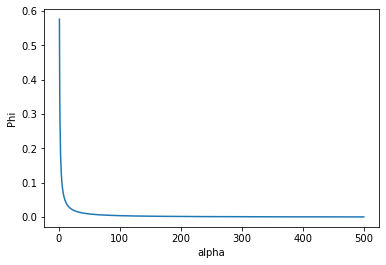

In [2]:
alpha = np.linspace(1, 500, 1000)
samples_sum = np.sum(samples)

# calculate phi function values
phi = []
rand_arr = np.arange(0, samples_sum)
for a in alpha:
    phi.append(
        np.log(a/(samples_sum+a))+np.sum(1/(rand_arr + a))
    )
# plot the function
plt.plot(alpha, phi)
plt.xlabel("alpha")
plt.ylabel("Phi")

As we can see from the graph, $\phi(\alpha)>0$ and the limit as $\alpha \to \infty$ is:

$$
\lim_{\alpha \to \infty}\phi(\alpha)=\lim_{\alpha \to \infty}\Big( \ln\Big( \frac{\alpha}{s+\alpha} \Big) + \sum_{i=0}^{s-1}\frac{1}{\alpha+i}\Big)=\ln(1)+0=0
$$

This limit suggests that we can choose a large value for $\alpha^*$ as an approximation. 

In this case, we take $\alpha^*=1000$ and $\beta^*=\frac{n}{s}\alpha^*$. 

[Go to the beginning of the assignment](#home)
<a id="POSTERIOR"></a><br/><br/>
<u>PREDICTIVE POSTERIOR DISTRIBUTION</u>


#### Compute the Predictive Posterior Distribution computed with the estimated values of α and β that is with $\alpha^*$ and $\beta^*$:
\begin{equation}
f(x|X) = \int f(x, \lambda|X) d\lambda = \int f(x|\lambda) f(\lambda|X) d\lambda = \int f(x|\lambda) f(\lambda|X, \alpha^*, \beta^*) d\lambda
\end{equation}

$$f(X|X)=\int f(x,\lambda|X)d\lambda =
\int f (x|\lambda)f (\lambda/X)dλ =
\int f(x|\lambda)f(\lambda|X,\alpha^{*}, \beta^{*})dλ=$$

$$=\int_{0}^{\infty}\frac{1}{x!}e^{-\lambda}\lambda^{x}\cdot\frac{(\beta^{*}+n)^{s+\alpha^{*}}}{\Gamma\left( s+\alpha^{*}\right)}\lambda^{s+\alpha^{*}-1}e^{-(\beta^{*}+n)\lambda}d\lambda=
\frac{(\beta^{*}+n)^{s+\alpha^{*}}}{x!\Gamma\left(s+\alpha^{*}\right)}
\int_{0}^{\infty}\lambda^{s+x+\alpha^{*}-1}e^{-(\beta^{*}+n+1)\lambda}d\lambda=$$

$$=\frac{1}{x!}\frac{(1000\frac{n}{s}+n)^{s+1000}}{(1000\frac{n}{s}+n+1)^{s+x+1000}}\prod_{i=0}^{x-1}(s+1000+i)=
\frac{1}{x!}\frac{s^{x}(1000n+ns)^{s+1000}}{(1000n+ns+s)^{s+x+1000}}\prod_{i=0}^{x-1}(s+1000+i)$$

[Go to the beginning of the assignment](#home)
<a id="MONTE_CARLO"></a><br/><br/>
<u>MONTE-CARLO COMPUTATIONS</u>


#### We want to compute the expectation of this distribution:
$$ \mu = E(x) = \int x f(x|\lambda)f(\lambda|X,\alpha^*,\beta^*)d\lambda dx $$,

#### which represents a good prediction of the value of $x$ given the observations $X_1,\dots,X_n$.

#### Since we also want an estimate of the uncertainty, we shall also compute the variance of it:
$$
\sigma^2 = Var(x) = \int (x - \mu)^2 f(x|\lambda)f(\lambda|X,\alpha^*,\beta^*)d\lambda dx.
$$

 #### In order to compute these two integrals, we shall use a Monte-Carlo approach.

#### Implement the MC algorithm and compute the estimations of both $\mu$ and $\sigma^2$.


We want to compute the expectation and variance of the distribution:

$$ \mu = E(x) = \int x f(x|\lambda)f(\lambda|X,\alpha^*,\beta^*)d\lambda dx $$

which represents a good prediction of the value of $x$ given the observations $X_1,\dots,X_n$.

First, we simplify the integral expression for the expectation:

$$\mathrm{E}[g(x)]=\int g(x)f(x/X)dx=\int\frac{g(x)}{x!}\Big(\frac{s}{1000n+sn+s}\Big)^x
\cdot\Big(\frac{1000n+ns}{1000n+sn+s}\Big)^{s+1000}\prod_{i=0}^{x-1}(s+1000+i)dx=\Big(\frac{1000n+ns}{1000n+sn+s}\Big)^{s+1000}\int\frac{g(x)}{x!}\Big(\frac{s}{1000n+sn+s}\Big)^x\prod_{i=0}^{x-1}(s+1000+i)
dx$$

We can reparameterize the integral for easier interpretation:

$$t=s+1000\quad\omega=\Big(\frac{tn}{tn+s}\Big)^t\quad\theta=\frac{s}{tn+s}$$

The integral becomes:

$$\Big(\frac{tn}{tn+s}\Big)^{t}\int\frac{g(x)}{x!}\Big(\frac{s}{tn+s}\Big)^x\prod_{i=0}^{x-1}(t+i)
dx=\omega\int\frac{g(x)}{x!}\theta^x\prod_{i=0}^{x-1}(t+i)
dx=\omega\int g(x)\prod_{j=0}^{x-1}\frac{\theta(t+j)}{i+j}dx=\omega\int_{a}^{b} g(x)p(x)
dx$$

where

$$p(x) = \prod_{j=0}^{x-1}\frac{\theta(t+j)}{j+1}$$


Monte-Carlo Integration
$\int_{a}^{b}f(x)dx\sim\frac{b-a}{N}\sum_{i=1}^{N}f(x_i)$ :


$$\omega\int_{a}^{b} g(x)p(x)
dx\sim\frac{\omega(b-a)}{N}\sum_{i=1}^{N}g(x_i)p(x_i)$$

Now we can approximate the expectation and variance using Monte-Carlo integration:

$$\mu\sim\frac{\omega(b-a)}{N}\sum_{i=1}^{N}x_ip(x_i)$$

$$\sigma^2\sim\frac{\omega(b-a)}{N}\sum_{i=1}^{N}(x_i-\mu)^2p(x_i)$$

In order to compute these two integrals, we shall use a Monte-Carlo approach.

In [3]:
class MonteCarlo:
    def __init__(self, X):
        # Compute values for alpha* and beta*
        s = np.sum(X)
        n = len(X)
        alpha_star = 1000
        beta_star = 1000 * n / s
        
        # Compute parameters for Monte Carlo integration
        self.t = 1000 + s
        self.theta = s / (self.t * n + s)
        self.omega = ((self.t * n) / (self.t * n + s)) ** self.t
    
    def compute_p(self, x):
        # Compute the product term in the integral
        res = 1
        for j in range(0, x):
            res *= (self.theta * (self.t + j) / (j + 1))
        return res
   
    def integration(self, g, a, b):
        # Perform Monte Carlo integration
        x = range(a, b)
        N = len(x)
        res = 0
        for xi in x:
            res += g(xi)*self.compute_p(xi)
        return self.omega * ((b - a) / N) * res 

In [5]:
mc = MonteCarlo(samples)
mu = mc.integration(lambda x: x, 0, 1000)
sigma_square = mc.integration(lambda x: (x-mu)**2, 0, 1000)

print("mu is {}".format(mu))
print("sigma square is: {}".format(sigma_square))

mu is 4.829999999999741
sigma square is: 4.845730883344316
